Part A:
**Sequential Forward Selection Method:**


First I import the needed libraries as below:

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

I preprocess the data to normalize it using **MinMaxScaler**, and then split it to train and test sets:

In [3]:
data = pd.read_csv("/Users/Nika/Desktop/ML_HW5/mdlon.csv")
Xs = pd.read_csv("/Users/Nika/Desktop/ML_HW5/mdlon.csv")
ys = pd.DataFrame(data, columns=["T"])
del Xs["T"]
X = np.asarray(Xs)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = np.asarray(ys)
y= y.reshape(len(y), )

training_data, testing_data, training_labels, testing_labels = train_test_split(X,y) 


I define a **sequential forward selection** function as below, that chooses the feature with **minimum mean square of errors** at each iteration, and returns the selected features and list of errors.

In [16]:
def SFS(training_data, testing_data, training_labels, testing_labels):
        index_list = []
        error_list = []
        for i in range(len(training_data[0])):
            best_index = 0
            min_error = 100
            for j in range(len(training_data[0])):
                if j not in index_list:
                    index_list.append(j)
                    NB = MultinomialNB()
                    NB.fit(training_data[:, index_list], training_labels)
                    error = mean_squared_error(testing_labels, NB.predict(testing_data[:, index_list]))
                    if (error <= min_error):
                        min_error = error
                        best_index = j
                    index_list.pop()
            index_list.append(best_index)
            error_list.append(min_error)
        return index_list, error_list

selected, error_list = SFS(training_data, testing_data, training_labels, testing_labels)

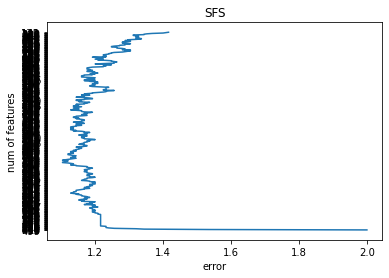

In [22]:
temp = min(error_list)
index = int(0)
for i in range(len(error_list)):
    if error_list[i] == temp:
        index = i
               
plt.plot(error_list, [str(i) for i in selected])
plt.title('SFS')
plt.xlabel('error')
plt.ylabel('num of features')
plt.show()

I define a **sequential backward elimination** function as below, that chooses the feature with **max mean square of errors** at each iteration, and returns the selected features to be removed and list of errors:

In [23]:
def SBE(training_data, testing_data, training_labels, testing_labels):
        index_list = []
        error_list = []
        for i in range(len(training_data[0])):
            best_index = 0
            min_error = 100
            for j in range(len(training_data[0])-1):
                if j not in index_list:
                    index_list.append(j)
                    NB = MultinomialNB()
                    NB.fit(np.delete(training_data, index_list, axis=1), training_labels)
                    error = mean_squared_error(testing_labels, NB.predict(np.delete(testing_data, index_list, axis=1)))
                    if (error <= min_error):
                        min_error = error
                        best_index = j
                    index_list.pop()
            index_list.append(best_index)
            error_list.append(min_error)
        return index_list,error_list

removed, error_list_2 = SBE(training_data, testing_data, training_labels, testing_labels)

In [26]:
def SBE(training_data, testing_data, training_labels, testing_labels):
        index_list = []
        error_list = []
        for i in range(len(training_data[0])):
            best_index = max_error = 0
            for j in range(len(training_data[0])-1):
                if j not in index_list:
                    index_list.append(j)
                    NB = MultinomialNB()
                    NB.fit(np.delete(training_data, index_list, axis=1), training_labels)
                    error = mean_squared_error(testing_labels, NB.predict(np.delete(testing_data, index_list, axis=1)))
                    if (error >= max_error):
                        max_error = error
                        best_index = j
                    index_list.pop()
            index_list.append(best_index)
            error_list.append(max_error)
        return index_list,error_list

removed, error_list_2 = SBE(training_data, testing_data, training_labels, testing_labels)

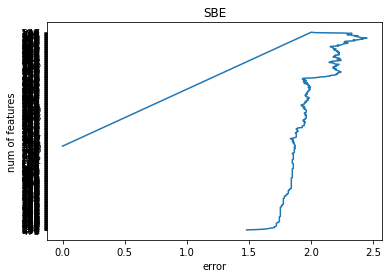

In [27]:
temp_2 = min(error_list_2)
index = 0
for i in range(len(error_list_2)):
    if error_list_2[i] == temp_2:
        index = i
        
plt.plot(error_list_2, [str(i) for i in removed])
plt.title('SBE')
plt.xlabel('error')
plt.ylabel('num of features')
plt.show()

Now comparison of the two algorithms: As we see, the SBE algorithm is **more accurate** since its error is less, and as we see from the running time of both algorithms, the SBE algorithm takes **longer time.**

In [30]:
print("best features to be selected according to SFS",selected)
print("best features to be removed according to SBE",removed)
print("min error of SFS", min(error_list))
print("min error of SBE",min(error_list_2))

best features to be selected according to SFS [499, 475, 19, 238, 440, 439, 151, 474, 419, 412, 112, 457, 456, 384, 317, 473, 454, 330, 358, 307, 301, 382, 265, 471, 351, 309, 185, 251, 46, 25, 398, 308, 53, 268, 247, 455, 466, 405, 359, 490, 143, 244, 208, 95, 196, 26, 177, 44, 363, 74, 204, 12, 121, 322, 370, 56, 116, 114, 246, 113, 134, 7, 392, 106, 129, 165, 142, 327, 245, 214, 149, 315, 145, 111, 459, 207, 70, 181, 399, 299, 290, 391, 381, 122, 231, 22, 482, 62, 443, 272, 458, 450, 232, 368, 325, 353, 282, 203, 406, 432, 124, 356, 321, 197, 51, 488, 254, 260, 275, 383, 364, 235, 341, 280, 50, 171, 388, 240, 71, 120, 84, 441, 402, 107, 2, 376, 320, 324, 297, 352, 27, 452, 478, 326, 332, 90, 345, 288, 294, 35, 487, 400, 186, 130, 229, 202, 436, 434, 11, 284, 403, 164, 335, 279, 486, 461, 137, 159, 387, 86, 389, 13, 80, 68, 104, 98, 477, 34, 348, 312, 470, 361, 215, 344, 495, 300, 291, 58, 160, 263, 89, 380, 47, 201, 234, 468, 24, 451, 87, 103, 135, 365, 182, 252, 331, 18, 498, 78, 3